In [57]:
import pandas as pd
import numpy as np
from datetime import datetime as dt

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

In [201]:
train_data = pd.read_csv(r'D:\vipul\Github projects\data_science_projects\hackerearth practice\Predict the price\dataset\train.csv')

In [202]:
test_data = pd.read_csv(r'D:\vipul\Github projects\data_science_projects\hackerearth practice\Predict the price\dataset\test.csv')

In [203]:
train_data.sample(5)

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
5549,DRPEHWBFVFRQHHDG,18.0,2016-03-29 01:08:03.000,268,Skarlet,Yes,Home_decor,2,57,0.0,271.0,10.0,1258.0,3497.0,2633.914368
5796,BRAECPMHFGKYKJHA,32.0,2015-08-18 21:08:07.000,149,Boone,Yes,Home_decor,0,92,0.0,238.0,15.0,6822.0,9498.0,8289.132544
6272,SHIEYZF6GPYGTTWY,40.0,2015-10-22 21:47:32.000,55,Keisha,No,Child_care,0,84,0.0,295.0,13.0,1601.0,3752.0,2932.140288
4598,PACEDFZPHQUZ9HET,49.0,2015-09-25 15:27:07.000,58,Becca,No,Pet_care,1,82,0.0,184.0,3.0,3001.0,3853.0,3560.016768
6116,NKCDXU3QDCXYHZD4,46.0,2015-09-24 21:11:28.000,65,Shira,Yes,Fashion,2,21,NaN,360.0,15.0,2236.0,4118.0,3532.915575


In [204]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6368 non-null   object 
 1   Stall_no          6363 non-null   float64
 2   instock_date      6368 non-null   object 
 3   Market_Category   6368 non-null   int64  
 4   Customer_name     6157 non-null   object 
 5   Loyalty_customer  6368 non-null   object 
 6   Product_Category  6368 non-null   object 
 7   Grade             6368 non-null   int64  
 8   Demand            6368 non-null   int64  
 9   Discount_avail    6330 non-null   float64
 10  charges_1         6170 non-null   float64
 11  charges_2 (%)     6163 non-null   float64
 12  Minimum_price     6330 non-null   float64
 13  Maximum_price     6025 non-null   float64
 14  Selling_Price     6327 non-null   float64
dtypes: float64(7), int64(3), object(5)
memory usage: 746.4+ KB


In [205]:
train_data.describe()

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
count,6363.000000,6368.000000,6368.000000,6368.000000,6330.000000,6170.000000,6163.000000,6330.000000,6025.000000,6327.000000
mean,25.309445,199.340609,0.643687,50.921168,0.140442,264.514100,10.146195,3531.349763,6432.545892,4563.242592
std,14.328980,170.275570,1.025092,29.091922,0.347473,124.483056,4.318339,2194.729604,3716.177364,2979.102408
min,1.000000,0.000000,0.000000,1.000000,0.000000,100.000000,1.000000,1.000000,404.000000,-6062.470000
25%,13.000000,55.000000,0.000000,26.000000,0.000000,163.000000,7.000000,1879.250000,3918.000000,2450.005280
50%,25.000000,132.000000,0.000000,51.000000,0.000000,252.000000,10.000000,3157.500000,5634.000000,4210.384640
75%,37.000000,403.000000,2.000000,76.000000,0.000000,314.000000,14.000000,4697.000000,8126.000000,6167.643252
max,50.000000,471.000000,3.000000,100.000000,1.000000,649.000000,17.000000,17580.000000,58812.000000,22638.325941


In [206]:
train_data.describe(include='O')

,Product_id,instock_date,Customer_name,Loyalty_customer,Product_Category
count,6368,6368,6157,6368,6368
unique,6368,5350,5900,2,10
top,BRAE2NF6JA5GUEXG,2015-09-22 15:24:59.000,Kennedy,Yes,Pet_care
freq,1,6,2,3887,682


In [207]:
(train_data.isna().sum()/len(train_data))*100

Product_id          0.000000
Stall_no            0.078518
instock_date        0.000000
Market_Category     0.000000
Customer_name       3.313442
Loyalty_customer    0.000000
Product_Category    0.000000
Grade               0.000000
Demand              0.000000
Discount_avail      0.596734
charges_1           3.109296
charges_2 (%)       3.219221
Minimum_price       0.596734
Maximum_price       5.386307
Selling_Price       0.643844
dtype: float64

### Treat Missing values

In [66]:
#remove records with missing selling price

train_data1 = train_data[pd.notnull(train_data.Selling_Price)]

In [67]:
train_data1[train_data1.Discount_avail==1].sample(10)

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
485,PTYEAF59EF4Q9R7M,29.0,2015-08-15 20:13:36.000,441,Kalani,Yes,Home_decor,0,95,1.0,221.0,16.0,4873.0,7837.0,973.699373
75,BLAE6DPHGJXV84EH,21.0,2015-08-16 19:19:21.000,85,Duncan,Yes,Home_decor,2,89,1.0,240.0,15.0,1805.0,2627.0,363.585869
239,NKCE9YFBJECEYPAH,36.0,2015-11-17 20:29:52.000,103,Rozlynn,Yes,Technology,1,46,1.0,530.0,15.0,11822.0,16687.0,2206.668355
6153,WATDZ2ZQTQVJYHZ4,31.0,2016-03-28 23:02:33.000,101,Aubreyanna,Yes,Technology,0,54,1.0,592.0,5.0,653.0,2618.0,332.108813
2554,NKCEBKWHJE7TWABZ,22.0,2015-12-06 03:05:51.000,446,Mykayla,No,Child_care,0,90,1.0,342.0,7.0,4575.0,6650.0,880.894291
3839,BRAE8WYHWQ2QA6JG,2.0,2015-08-17 23:12:20.000,14,Berkley,Yes,Child_care,0,33,1.0,284.0,6.0,4483.0,6614.0,873.186064
4888,SHIEBTT2Y5CEXB4V,41.0,2015-09-23 16:28:32.000,108,Ellia,No,Child_care,0,63,1.0,264.0,6.0,947.0,3147.0,343.366155
4214,NKCE3SGNWD4HZNYR,12.0,2016-01-05 07:24:06.000,3,Taylon,No,Child_care,0,98,1.0,275.0,5.0,2605.0,3497.0,491.942035
1640,BRAE44SUWY4R349F,11.0,2015-08-20 03:34:43.000,83,Jarrett,Yes,Educational,0,91,1.0,159.0,10.0,1132.0,4077.0,408.940224
1338,NKCEBQ7BUZ3VXYNR,49.0,2016-01-17 22:26:29.000,115,Roslynn,No,Home_decor,0,9,1.0,290.0,17.0,1435.0,2035.0,304.162081


In [68]:
train_data1['Stall_no'].value_counts()

Stall_no
20.0    164
2.0     151
31.0    144
32.0    144
14.0    143
25.0    141
41.0    137
9.0     136
23.0    135
16.0    135
37.0    135
28.0    133
33.0    132
7.0     132
15.0    132
12.0    131
17.0    131
34.0    130
3.0     129
19.0    129
5.0     129
1.0     127
24.0    126
46.0    126
44.0    126
11.0    126
48.0    125
36.0    124
18.0    123
42.0    123
30.0    123
27.0    123
40.0    123
26.0    122
50.0    122
43.0    122
47.0    120
29.0    120
4.0     120
39.0    119
35.0    118
22.0    117
45.0    115
6.0     115
10.0    115
49.0    110
38.0    110
21.0    108
8.0     105
13.0     96
Name: count, dtype: int64

In [69]:
(train_data1.isna().sum()/len(train_data1))*100

Product_id          0.000000
Stall_no            0.079026
instock_date        0.000000
Market_Category     0.000000
Customer_name       3.271693
Loyalty_customer    0.000000
Product_Category    0.000000
Grade               0.000000
Demand              0.000000
Discount_avail      0.584795
charges_1           3.129445
charges_2 (%)       3.224277
Minimum_price       0.600601
Maximum_price       5.389600
Selling_Price       0.000000
dtype: float64

In [70]:
num_var=train_data.select_dtypes('number').columns.to_list()
cat_var = train_data.select_dtypes('O').columns.to_list()

In [71]:
train_data['Instock_date'] = train_data.instock_date.apply(lambda x: dt.strptime(x[:10],'%Y-%m-%d'))
train_data['month'] = train_data.Instock_date.apply(lambda x: x.month)
train_data['day'] = train_data.Instock_date.apply(lambda x: x.day)
train_data['year'] = train_data.Instock_date.apply(lambda x: x.year)

In [72]:
train_data['Instock_date'].apply(lambda x: (x.year*100)+x.month).value_counts()

Instock_date
201603    1352
201509    1263
201508    1091
201505     768
201511     664
201601     397
201602     344
201512     194
201510      85
201507      61
201504      34
201411      34
201502      33
201410      17
201501      14
201503       9
201402       5
201412       3
Name: count, dtype: int64

In [73]:
train_data[pd.isnull(train_data['charges_1'])]

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,Instock_date,month,day,year
16,SHIEBKMSYJFA9XZT,14.0,2015-09-24 16:28:03.000,1,Arantxa,No,Fashion,0,74,0.0,NaN,11.0,786.0,NaN,2582.860500,2015-09-24,9,24,2015
33,BRAE8TFHWYCTDUM3,17.0,2015-08-19 21:08:45.000,101,Roslyn,No,Repair,0,19,0.0,NaN,9.0,950.0,1580.0,1563.983586,2015-08-19,8,19,2015
76,ACCEHZF95ZRCKACD,7.0,2015-05-09 17:19:45.000,358,Linda,Yes,Cosmetics,3,31,0.0,NaN,NaN,9483.0,13644.0,11761.213275,2015-05-09,5,9,2015
106,MUGEACY8DDVJ8QAD,30.0,2015-09-22 17:22:59.000,451,Maximillian,Yes,Fashion,0,53,0.0,NaN,17.0,4627.0,NaN,5512.304016,2015-09-22,9,22,2015
182,PBXEAREZRNRE8BBY,39.0,2015-11-20 05:56:33.000,70,Jacion,No,Fashion,2,98,0.0,NaN,16.0,3225.0,5287.0,4592.708736,2015-11-20,11,20,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6212,KTAEHE9KNNU7RP4Z,12.0,2014-11-04 13:30:23.000,13,Levi,Yes,Hospitality,3,44,0.0,NaN,10.0,341.0,2196.0,1473.280272,2014-11-04,11,4,2014
6216,PBXE5SJHVBDY7PHS,5.0,2015-11-17 18:29:51.000,451,Liesl,No,Technology,0,85,0.0,NaN,10.0,5647.0,7671.0,7021.079296,2015-11-17,11,17,2015
6243,SHIE3QDH6Z4KU5TY,6.0,2015-08-23 19:36:12.000,146,NaN,No,Hospitality,2,4,0.0,NaN,13.0,1669.0,2557.0,2356.514325,2015-08-23,8,23,2015
6246,PACEBEW6FSE32PDY,31.0,2015-09-24 15:24:14.000,91,Mayla,No,Cosmetics,0,9,0.0,NaN,17.0,1782.0,4000.0,3147.595209,2015-09-24,9,24,2015


In [74]:
train_data[pd.notnull(train_data['charges_1'])]

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,Instock_date,month,day,year
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700,2015-08-22,8,22,2015
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256,2016-03-27,3,27,2016
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362,2015-08-18,8,18,2015
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824,2016-03-28,3,28,2016
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935,2016-03-29,3,29,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6363,WATE7VE2D62VEKW8,17.0,2016-03-28 19:55:43.000,24,Marquell,Yes,Technology,0,47,0.0,614.0,10.0,8174.0,11266.0,10277.520192,2016-03-28,3,28,2016
6364,SHOEF9G8Z4ZXF6WE,21.0,2015-02-11 15:09:26.000,55,Theodore,Yes,Child_care,0,35,0.0,269.0,5.0,3564.0,4920.0,4501.837200,2015-02-11,2,11,2015
6365,PBXEB9ZQ7HHCFXYG,36.0,2015-11-19 17:29:21.000,358,Galen,No,Repair,3,29,0.0,283.0,3.0,5303.0,14614.0,10218.878775,2015-11-19,11,19,2015
6366,NKCEAGXHRYTNTMG7,27.0,2015-12-08 04:19:33.000,452,Posey,Yes,Repair,0,8,0.0,267.0,3.0,4334.0,5849.0,5359.493997,2015-12-08,12,8,2015


In [75]:
train_data['Product_Category'].value_counts(normalize=True)*100

Product_Category
Pet_care       10.709799
Repair         10.615578
Child_care     10.332915
Cosmetics      10.191583
Hospitality     9.924623
Technology      9.736181
Organic         9.736181
Home_decor      9.689070
Educational     9.579146
Fashion         9.484925
Name: proportion, dtype: float64

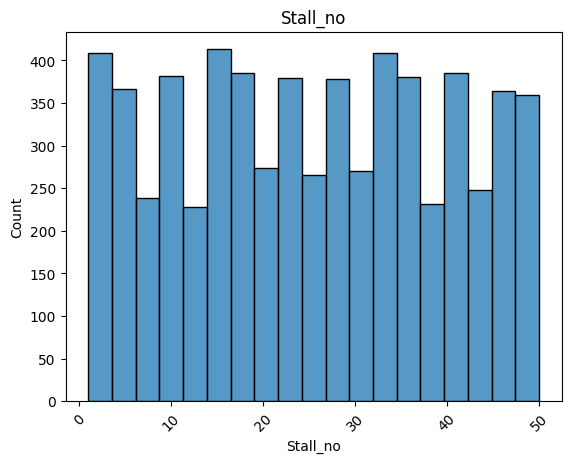

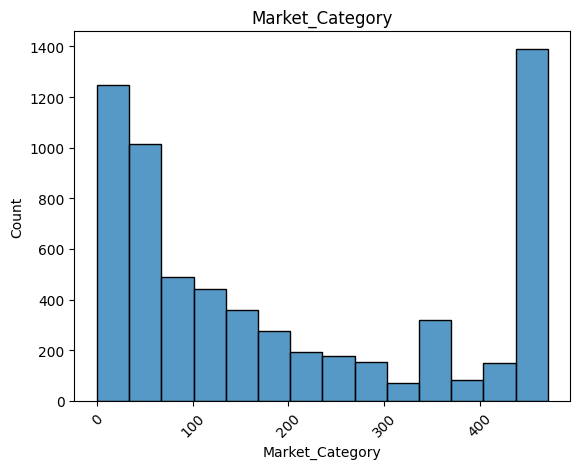

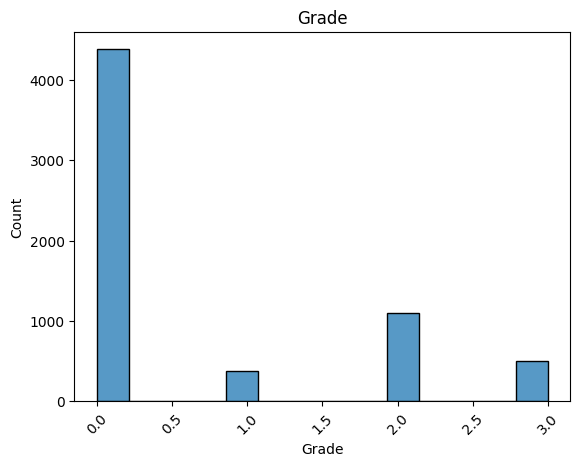

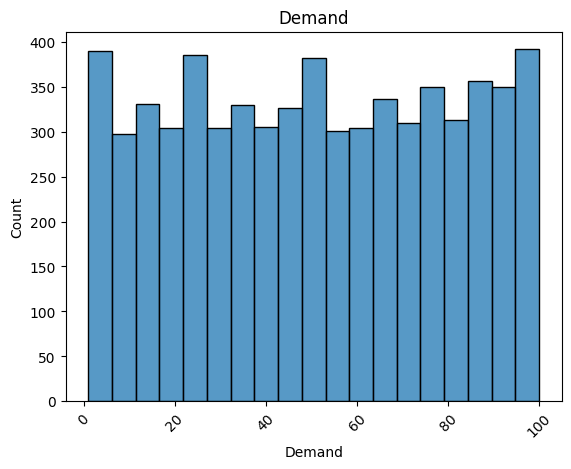

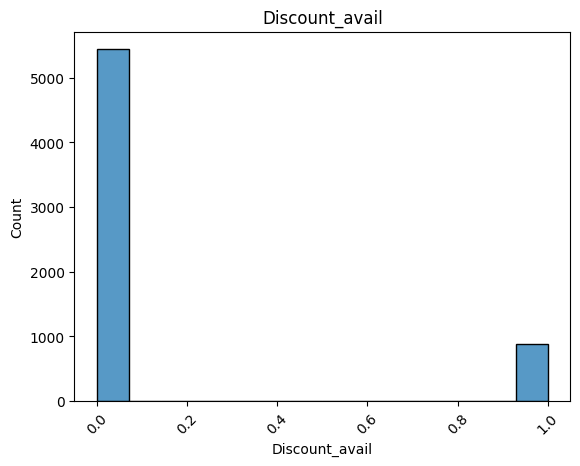

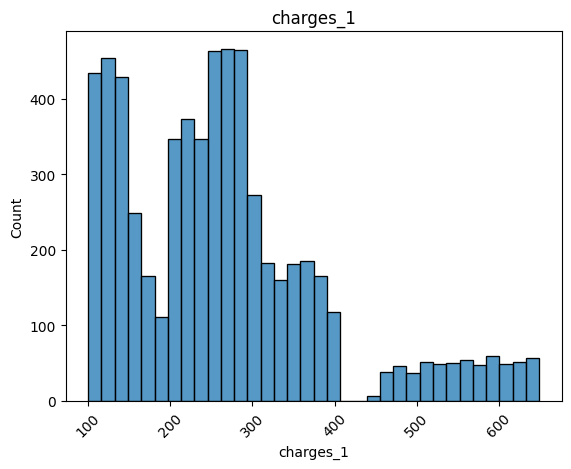

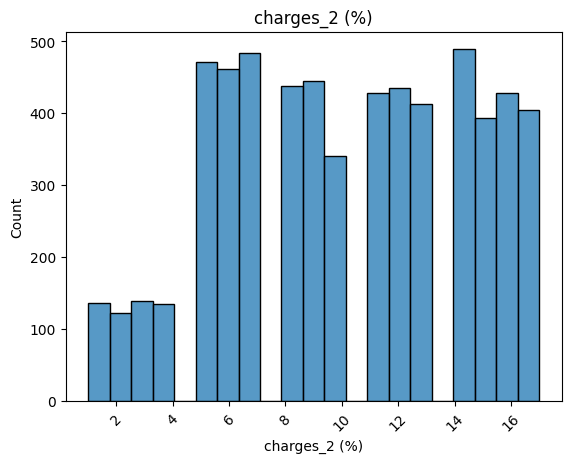

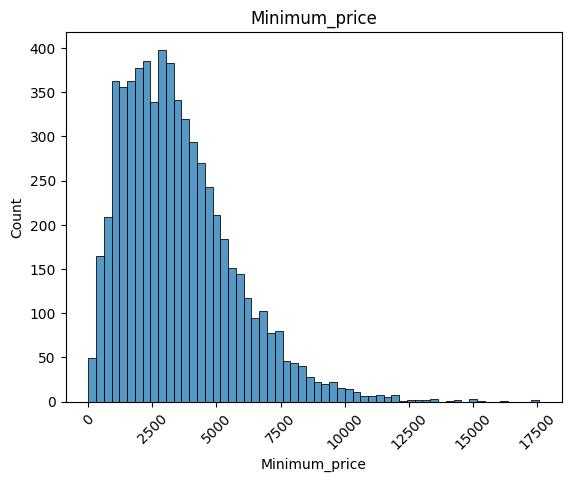

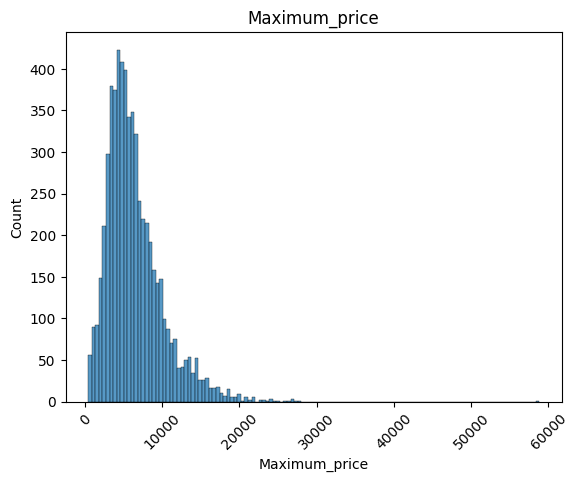

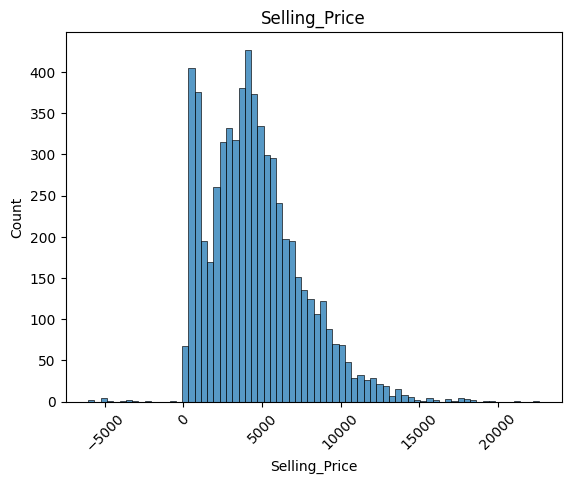

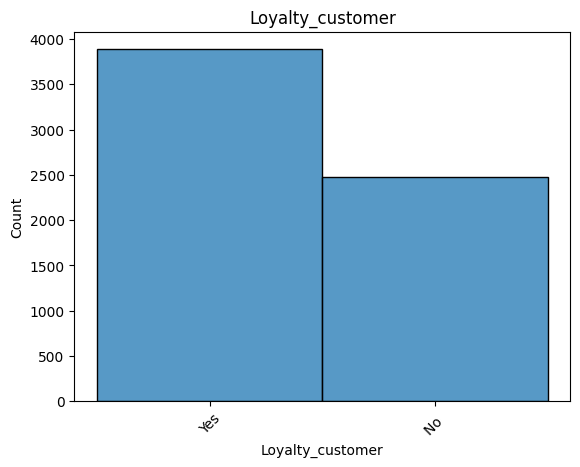

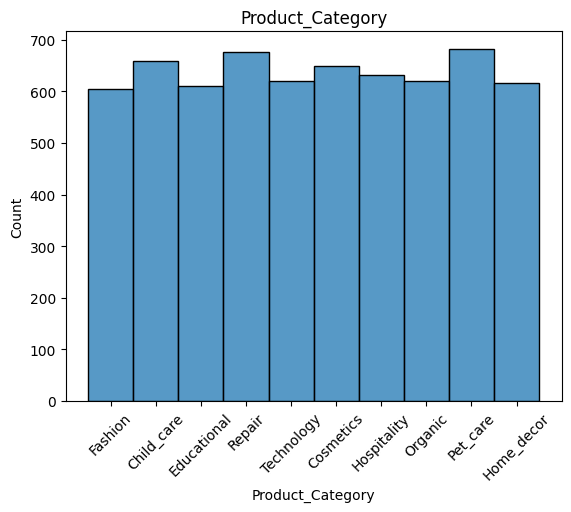

In [76]:
for i in num_var+['Loyalty_customer','Product_Category']:
    sns.histplot(train_data[i])
    plt.title(i)
    plt.xticks(rotation=45)
    plt.show()

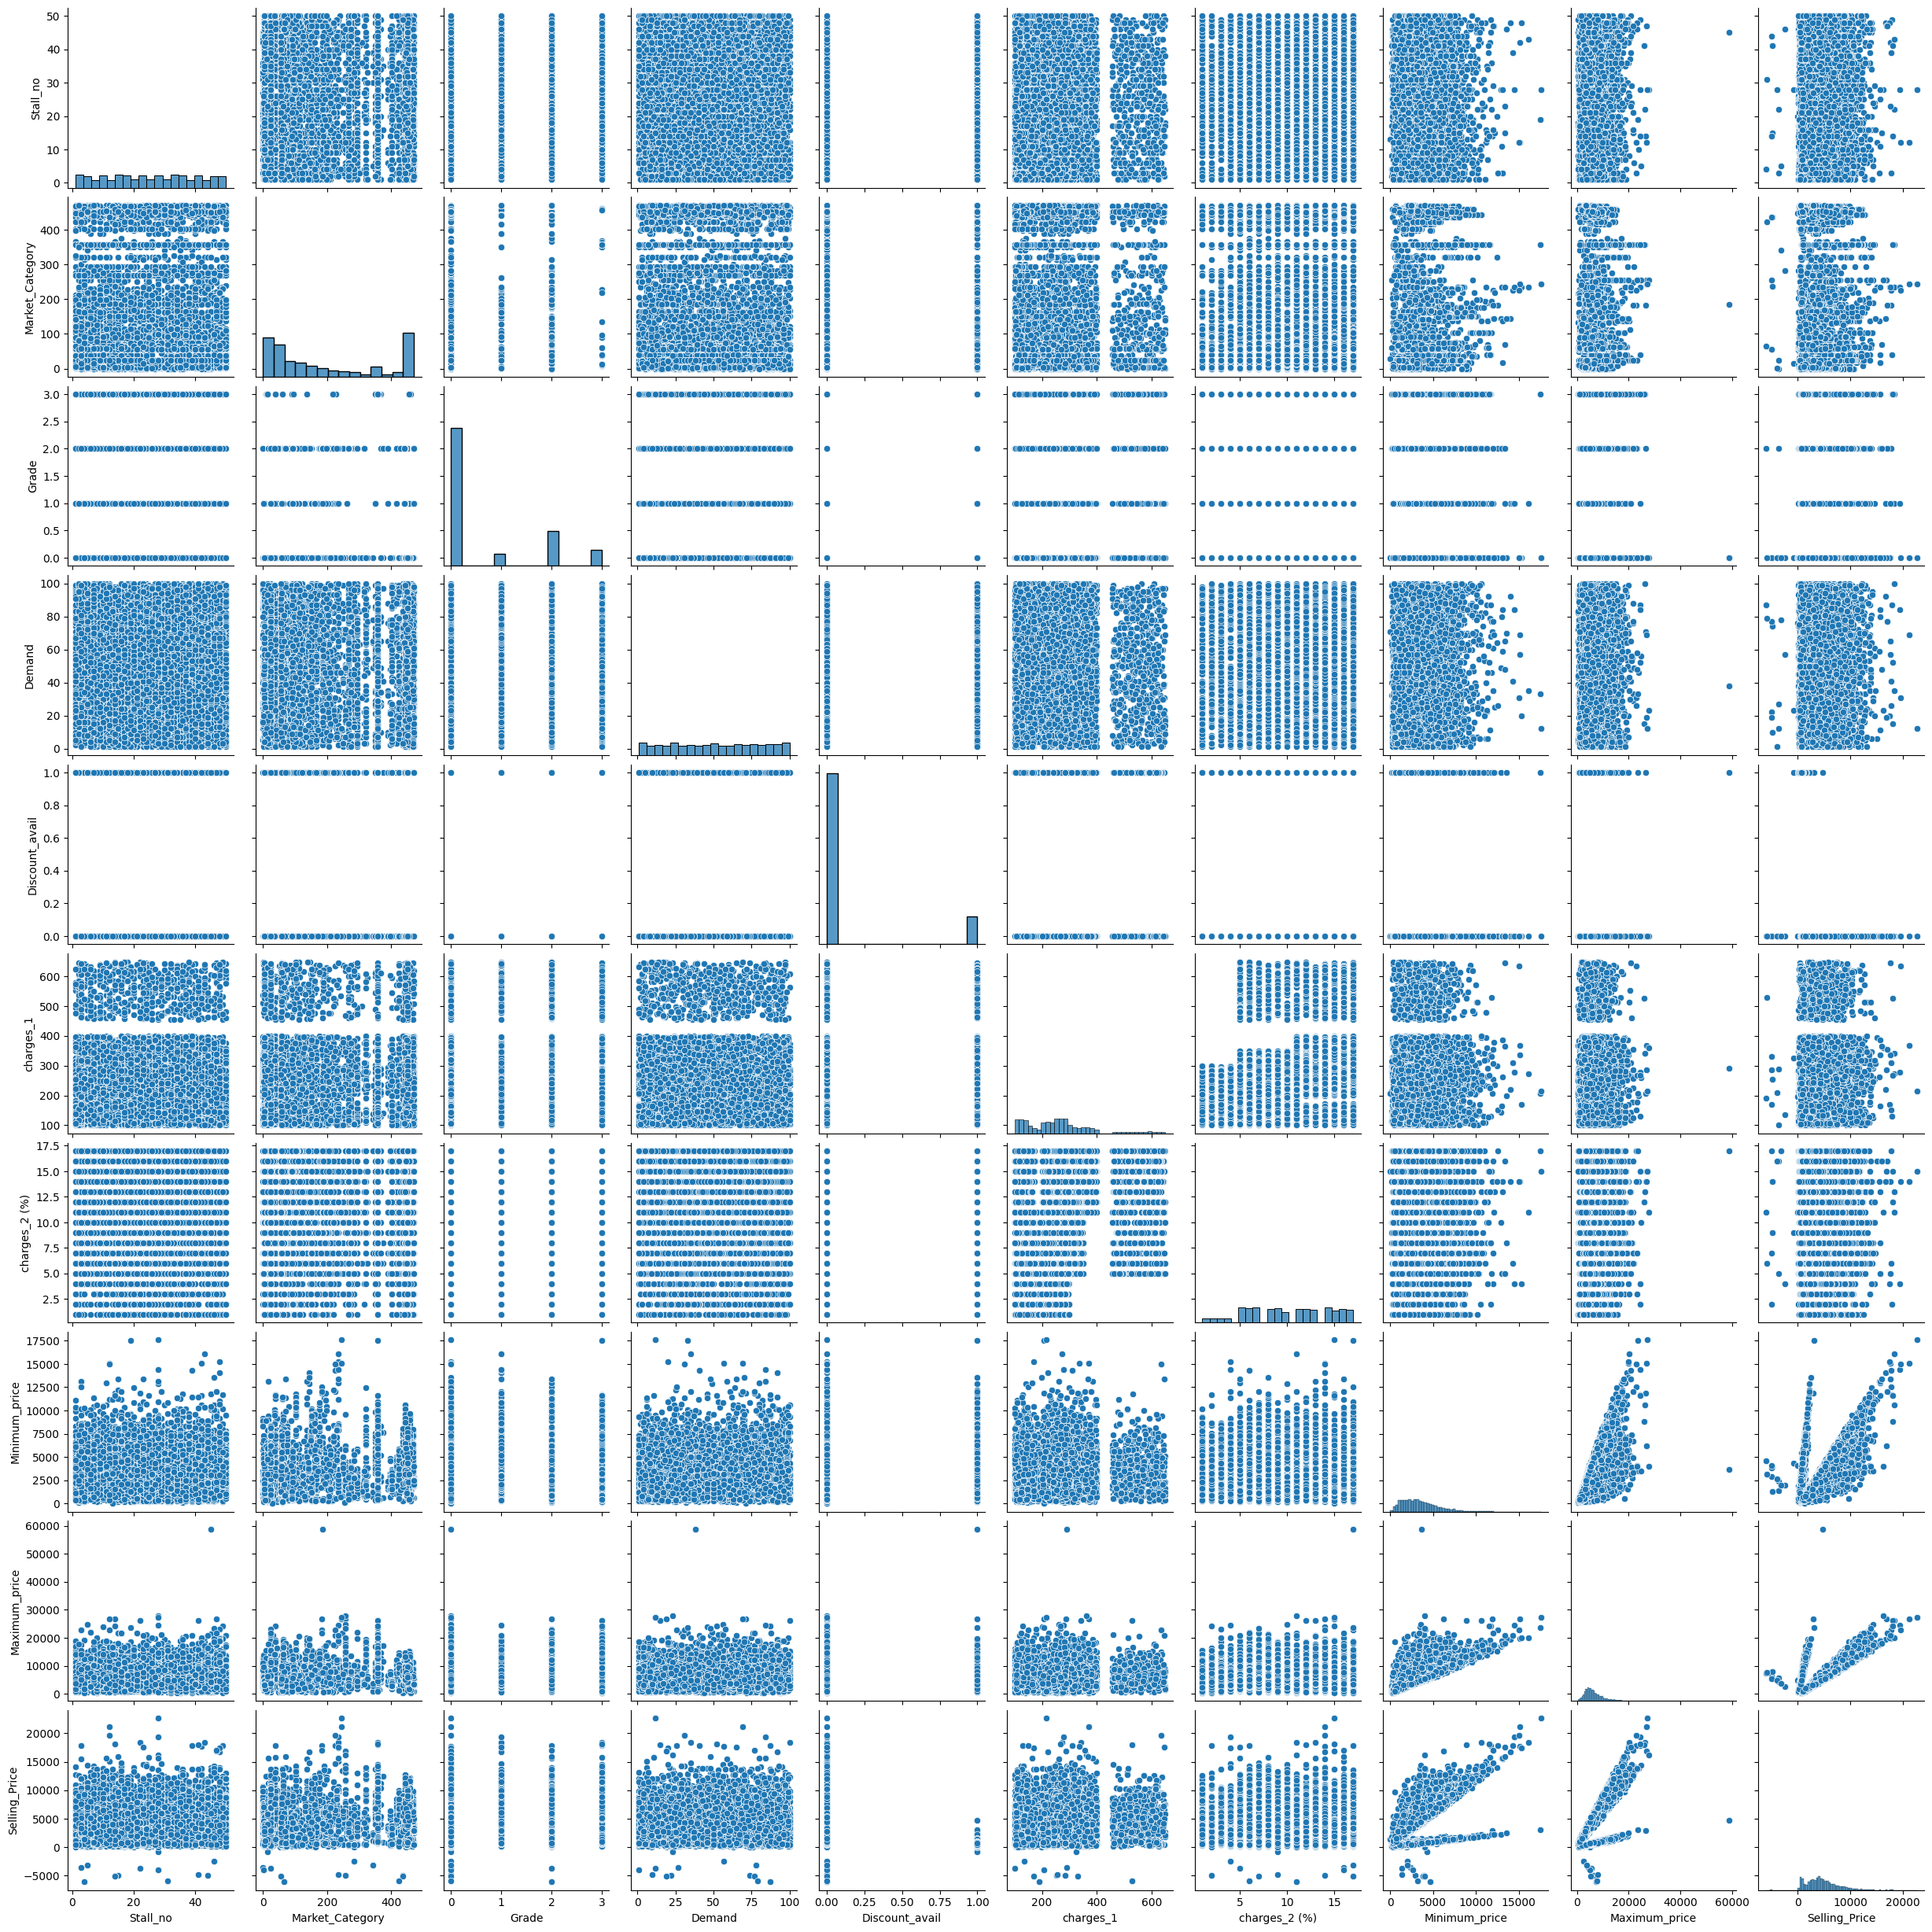

In [77]:
sns.pairplot(train_data[num_var])

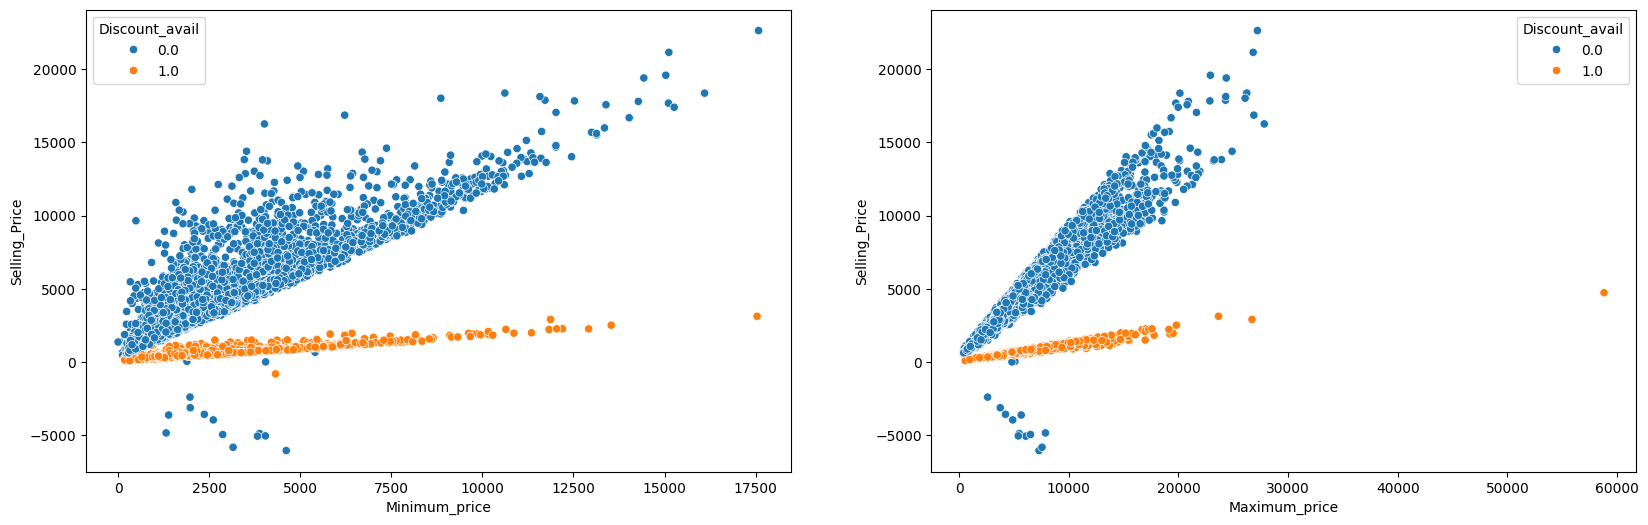

In [78]:
fig,axs = plt.subplots(1,2,figsize=(20,6))
sns.scatterplot(train_data1,x='Minimum_price',y='Selling_Price',hue='Discount_avail',ax=axs[0])
sns.scatterplot(train_data1,x='Maximum_price',y='Selling_Price',hue='Discount_avail',ax=axs[1])
plt.show()

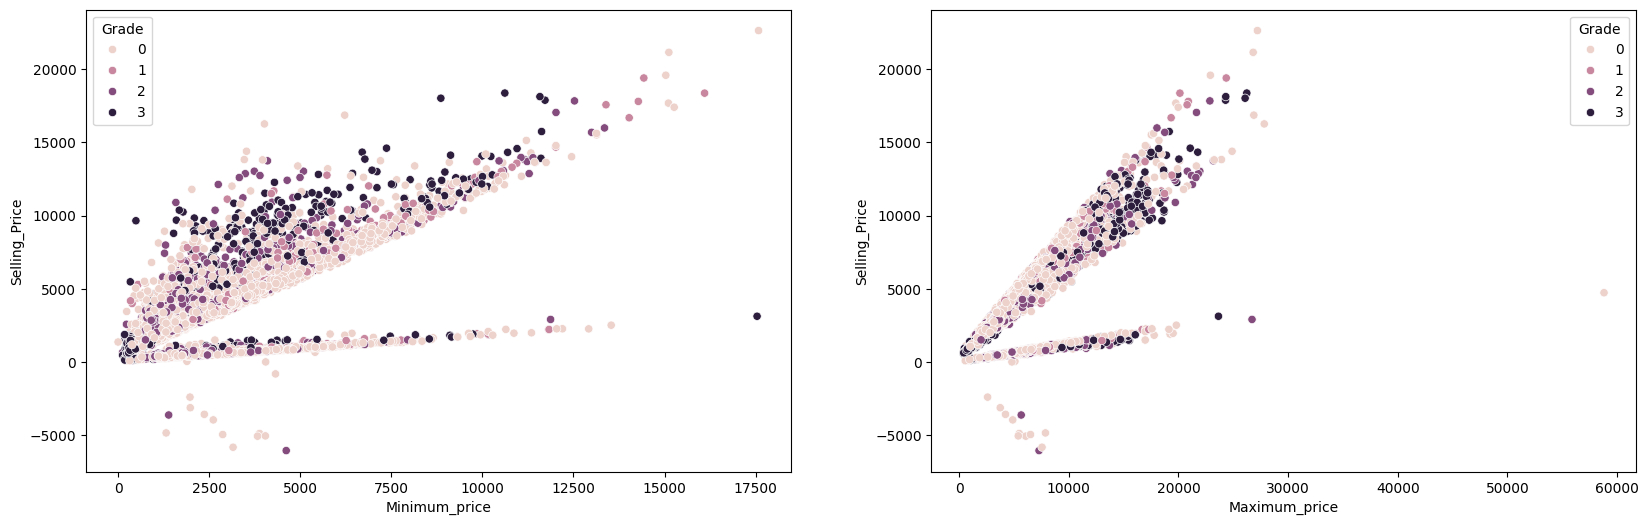

In [79]:
fig,axs = plt.subplots(1,2,figsize=(20,6))
sns.scatterplot(train_data1,x='Minimum_price',y='Selling_Price',hue='Grade',ax=axs[0])
sns.scatterplot(train_data1,x='Maximum_price',y='Selling_Price',hue='Grade',ax=axs[1])
plt.show()

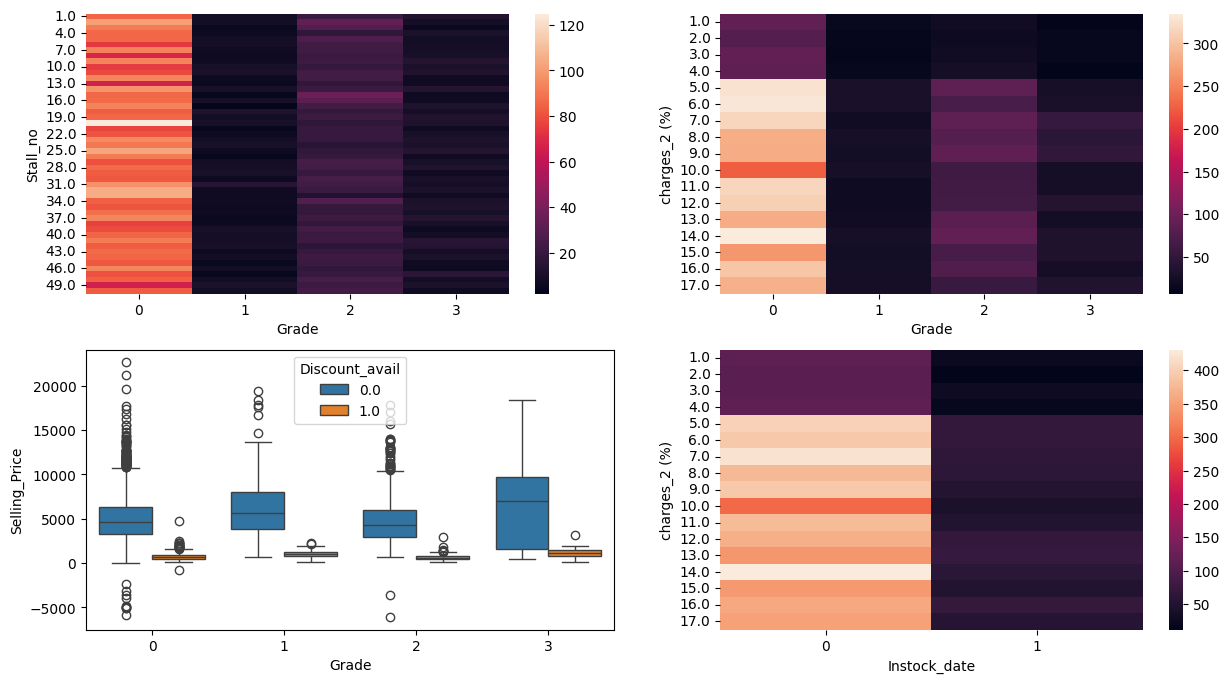

In [99]:
fig,axs = plt.subplots(2,2,figsize=(15,8))
sns.heatmap(pd.crosstab(train_data1['Stall_no'],train_data1['Grade']),ax=axs[0,0])
sns.heatmap(pd.crosstab(train_data1['charges_2 (%)'],train_data1['Grade']),ax=axs[0,1])
sns.boxplot(y=train_data1['Selling_Price'],x=train_data1['Grade'],hue=train_data1['Discount_avail'],ax=axs[1,0])
sns.heatmap(pd.crosstab(train_data['charges_2 (%)'],train_data['Instock_date'].apply(lambda x: (x>dt(x.year,10,31))*1)),ax=axs[1,1])
plt.show()

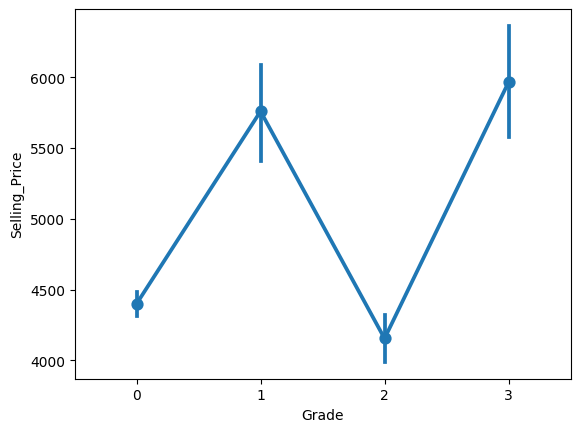

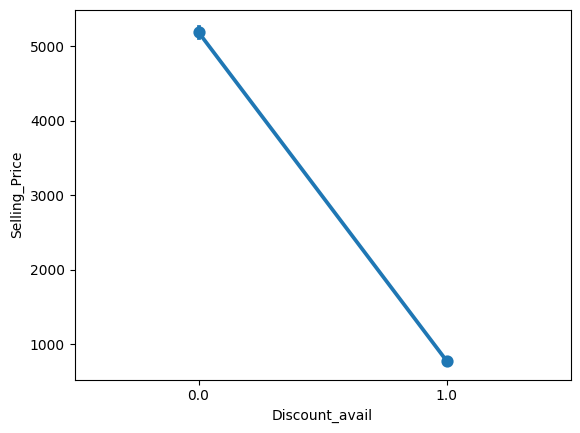

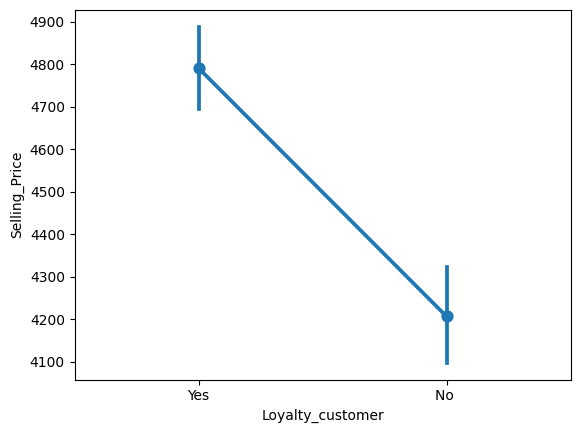

In [81]:
for i in ['Grade','Discount_avail','Loyalty_customer']:
    sns.pointplot(data=train_data1,x=i,y='Selling_Price')
    plt.show()

In [200]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn import set_config
set_config(display='diagram')
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

In [211]:
train_data2 = train_data[train_data.Selling_Price>0]
train_data2=train_data2[~(train_data2.isna().any(axis=1))]
train_data2

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6363,WATE7VE2D62VEKW8,17.0,2016-03-28 19:55:43.000,24,Marquell,Yes,Technology,0,47,0.0,614.0,10.0,8174.0,11266.0,10277.520192
6364,SHOEF9G8Z4ZXF6WE,21.0,2015-02-11 15:09:26.000,55,Theodore,Yes,Child_care,0,35,0.0,269.0,5.0,3564.0,4920.0,4501.837200
6365,PBXEB9ZQ7HHCFXYG,36.0,2015-11-19 17:29:21.000,358,Galen,No,Repair,3,29,0.0,283.0,3.0,5303.0,14614.0,10218.878775
6366,NKCEAGXHRYTNTMG7,27.0,2015-12-08 04:19:33.000,452,Posey,Yes,Repair,0,8,0.0,267.0,3.0,4334.0,5849.0,5359.493997


In [256]:
class date_extractor(BaseEstimator,TransformerMixin):

    def __init__(self,date_columns):
        self.date_columns = date_columns

    def fit(self,X,y=None):
        return self
    
    def get_feature_names_out(self,input_features=None):
            if isinstance(input_features, list):
                return input_features + [f'{col}_year' for col in self.date_columns] + \
                                     [f'{col}_month' for col in self.date_columns] + \
                                     [f'{col}_day' for col in self.date_columns]
            else:  # Handle NumPy array
                return list(input_features) + [f'{col}_year' for col in self.date_columns] + \
                                          [f'{col}_month' for col in self.date_columns] + \
                                          [f'{col}_day' for col in self.date_columns]

    def transform(self,X):
        for i in self.date_columns:
            X[i+'_dated'] = X[i].apply(lambda x: dt.strptime(x[:10],'%Y-%m-%d'))
            X[i+'_year'] = X[i+'_dated'].dt.year
            X[i+'_month'] = X[i+'_dated'].dt.month
            X[i+'_day'] = X[i+'_dated'].dt.day

        return X.drop(columns=[i+'_dated' for i in self.date_columns])

In [257]:
X_train, X_test, y_train, y_test = train_test_split(train_data2.drop(columns=['Selling_Price']),train_data2['Selling_Price'],test_size=0.2,random_state=42)

In [258]:
X_train.head(5)

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
5339,WATEBVHCPGUXSH5U,27.0,2016-03-27 20:11:53.000,358,Izzabelle,Yes,Fashion,3,2,0.0,355.0,16.0,6367.0,16726.0
57,TOPEDQDFYDDZWY58,46.0,2016-03-30 02:22:08.000,27,Eily,Yes,Educational,0,60,0.0,111.0,10.0,6659.0,9900.0
4648,OTYEHZR7MXR4PBCZ,49.0,2016-02-21 22:39:21.000,30,Kirah,No,Cosmetics,0,91,0.0,208.0,12.0,2486.0,3402.0
2789,TSHEDNUUTYKDFDHF,38.0,2016-03-30 00:00:27.000,3,Aradhya,Yes,Repair,0,64,0.0,291.0,8.0,3068.0,5815.0
865,SHIE4GFNDBQTUBTU,10.0,2015-08-15 20:13:22.000,188,Xzavier,Yes,Pet_care,0,93,0.0,155.0,11.0,4581.0,6320.0


In [259]:
train_data1.head(5)

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [319]:
date_trf=make_column_transformer(
    (date_extractor(['instock_date']),['instock_date']),
    remainder='passthrough')

In [320]:
imp_trf=make_column_transformer(
    (SimpleImputer(strategy='most_frequent'),[8,12]),
    (SimpleImputer(strategy='median'),[13,14,15,16]),
    ('drop',[0,4,5,6,7]),
    remainder='passthrough')

In [357]:
ohe_trf=make_column_transformer(
    (OneHotEncoder(dtype=np.int8,drop='first',sparse_output=False),[0,1,9,10]),
    remainder='passthrough')

In [358]:
from sklearn.linear_model import LinearRegression

In [359]:
lr_mod = LinearRegression()

In [360]:
pipe = Pipeline([('date_trf',date_trf),('imp_trf',imp_trf),('ohe_trf',ohe_trf)])

In [361]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('date_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('date_extractor',
                                                  date_extractor(date_columns=['instock_date']),
                                                  ['instock_date'])])),
                ('imp_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('simpleimputer-1',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [8, 12]),
                                                 ('simpleimputer-2',
                                                  SimpleImputer(strategy='median'),
                                                  [13, 14, 15, 16]),
                                                 ('drop', 'drop',
                                                  [0, 4, 5, 6, 7])])),
                ('ohe_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                dtype=<class 'numpy.int8'>,
                                                                sparse_output=False),
                                                  [0, 1, 9, 10])]))])

In [362]:

print("\nColumn Names after Date Tranformation:")
print(pipe.named_steps['date_trf'].get_feature_names_out(X_train.columns))


print("\nColumn Names after Imputation:")
print(pipe.named_steps['imp_trf'].get_feature_names_out())

# Print column names after one-hot encoding
print("\nColumn Names after One-Hot Encoding:")
print(pipe.named_steps['ohe_trf'].get_feature_names_out())


Column Names after Date Tranformation:
['date_extractor__instock_date' 'date_extractor__instock_date_year'
 'date_extractor__instock_date_month' 'date_extractor__instock_date_day'
 'remainder__Product_id' 'remainder__Stall_no'
 'remainder__Market_Category' 'remainder__Customer_name'
 'remainder__Loyalty_customer' 'remainder__Product_Category'
 'remainder__Grade' 'remainder__Demand' 'remainder__Discount_avail'
 'remainder__charges_1' 'remainder__charges_2 (%)'
 'remainder__Minimum_price' 'remainder__Maximum_price']

Column Names after Imputation:
['simpleimputer-1__x8' 'simpleimputer-1__x12' 'simpleimputer-2__x13'
 'simpleimputer-2__x14' 'simpleimputer-2__x15' 'simpleimputer-2__x16'
 'remainder__x1' 'remainder__x2' 'remainder__x3' 'remainder__x9'
 'remainder__x10' 'remainder__x11']

Column Names after One-Hot Encoding:
['onehotencoder__x0_Yes' 'onehotencoder__x1_1.0'
 'onehotencoder__x9_Cosmetics' 'onehotencoder__x9_Educational'
 'onehotencoder__x9_Fashion' 'onehotencoder__x9_Home_deco

In [364]:
from sklearn.metrics import mean_squared_log_error
from math import sqrt

In [181]:
pipe.get_params()

{'memory': None,
 'steps': [('imp_trf',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('simpleimputer-1',
                                    SimpleImputer(strategy='most_frequent'),
                                    [5, 9]),
                                   ('simpleimputer-2',
                                    SimpleImputer(strategy='median'),
                                    [10, 11, 12, 13]),
                                   ('drop', 'drop', [0, 1, 2, 3, 4, 14])])),
  ('ohe_trf',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehotencoder',
                                    OneHotEncoder(drop='first',
                                                  dtype=<class 'numpy.int8'>,
                                                  sparse_output=False),
                                    [0, 1, 6, 7])])),
  ('lr_mod', LinearRegression())],
 'verbose': False,
 'imp_trf': ColumnTransformer(remainder='pass

In [179]:
y_pred[y_pred<0]

array([-2800.763393  , -1336.49791233, -1924.61314917, -2155.19851735,
        -482.95587096,  -119.69140775, -1715.67427535,  -657.94546785,
       -1759.49711843,  -699.19987354, -1627.00716136, -1153.26923356,
       -2002.80425528,  -153.62681634,  -777.07374415, -1368.91483084,
       -2843.66014199, -1586.17104058, -2001.10459374,   -22.11191609,
       -2723.40484527, -3385.91451355, -1488.60774007,   -71.56583415,
        -855.75229237, -1640.0769713 ,  -345.25912385, -2588.38089887,
        -678.11487988,  -424.91085238,  -710.60459512, -1940.92509434,
        -855.58414119,  -349.60802897, -1549.95463057, -1019.20462947,
        -249.76980697, -2137.29144726,  -928.90567828,  -691.46145556,
       -2676.01034219,  -751.67233936,  -884.59544303,  -757.66171868,
          -9.6943219 , -1050.26279324,  -240.67686309, -2577.77804106,
        -347.16643555,  -488.51610049,   -77.20895353, -1046.99655898,
       -1124.96557921,  -957.10837374, -3338.71740733,  -842.93918631,
      

In [365]:
from sklearn.ensemble import RandomForestRegressor

In [371]:
rf_mod = RandomForestRegressor()
pipe2 = Pipeline([('date_trf',date_trf),('imp_trf',imp_trf),('ohe_trf',ohe_trf),('rf_mod',rf_mod)])

In [370]:
pipe2.fit(X_train,y_train)

Pipeline(steps=[('date_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('date_extractor',
                                                  date_extractor(date_columns=['instock_date']),
                                                  ['instock_date'])])),
                ('imp_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('simpleimputer-1',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [8, 12]),
                                                 ('simpleimputer-2',
                                                  SimpleImputer(strategy='median'),
                                                  [13, 14, 15, 16]),
                                                 ('drop', 'drop',
                                                  [0, 4, 5, 6, 7])])),
                ('ohe_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                dtype=<class 'numpy.int8'>,
                                                                sparse_output=False),
                                                  [0, 1, 9, 10])])),
                ('rf_mod', RandomForestRegressor())])

In [368]:
print("\nColumn Names after Date Tranformation:")
print(pipe2.named_steps['date_trf'].get_feature_names_out(X_train.columns))


print("\nColumn Names after Imputation:")
print(pipe2.named_steps['imp_trf'].get_feature_names_out())

# Print column names after one-hot encoding
print("\nColumn Names after One-Hot Encoding:")
print(pipe2.named_steps['ohe_trf'].get_feature_names_out())


Column Names after Date Tranformation:
['date_extractor__instock_date' 'date_extractor__instock_date_year'
 'date_extractor__instock_date_month' 'date_extractor__instock_date_day'
 'remainder__Product_id' 'remainder__Stall_no'
 'remainder__Market_Category' 'remainder__Customer_name'
 'remainder__Loyalty_customer' 'remainder__Product_Category'
 'remainder__Grade' 'remainder__Demand' 'remainder__Discount_avail'
 'remainder__charges_1' 'remainder__charges_2 (%)'
 'remainder__Minimum_price' 'remainder__Maximum_price']

Column Names after Imputation:
['simpleimputer-1__x8' 'simpleimputer-1__x12' 'simpleimputer-2__x13'
 'simpleimputer-2__x14' 'simpleimputer-2__x15' 'simpleimputer-2__x16'
 'remainder__x1' 'remainder__x2' 'remainder__x3' 'remainder__x9'
 'remainder__x10' 'remainder__x11']

Column Names after One-Hot Encoding:
['onehotencoder__x0_Yes' 'onehotencoder__x1_1.0'
 'onehotencoder__x9_Cosmetics' 'onehotencoder__x9_Educational'
 'onehotencoder__x9_Fashion' 'onehotencoder__x9_Home_deco

In [344]:
from sklearn.model_selection import RandomizedSearchCV

In [345]:
params={
    'rf_mod__max_depth':range(3,10),
    'rf_mod__min_samples_leaf':[1,0.01,0.05,0.1],
    'rf_mod__min_samples_split':[2,0.01,0.05,0.1]
}

In [372]:
rscv = RandomizedSearchCV(pipe2,param_distributions=params,n_jobs=-1,cv=5)
rscv.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('date_trf',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('date_extractor',
                                                                               date_extractor(date_columns=['instock_date']),
                                                                               ['instock_date'])])),
                                             ('imp_trf',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('simpleimputer-1',
                                                                               SimpleImputer(strategy='most_frequent'),
                                                                               [8,
                                                                                12]),
                                                                              ('simpleimput...
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehotencoder',
                                                                               OneHotEncoder(drop='first',
                                                                                             dtype=<class 'numpy.int8'>,
                                                                                             sparse_output=False),
                                                                               [0,
                                                                                1,
                                                                                9,
                                                                                10])])),
                                             ('rf_mod',
                                              RandomForestRegressor())]),
                   n_jobs=-1,
                   param_distributions={'rf_mod__max_depth': range(3, 10),
                                        'rf_mod__min_samples_leaf': [1, 0.01,
                                                                     0.05,
                                                                     0.1],
                                        'rf_mod__min_samples_split': [2, 0.01,
                                                                      0.05,
                                                                      0.1]})

In [373]:
y_pred=rscv.predict(X_test)

In [374]:
rscv.best_estimator_

Pipeline(steps=[('date_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('date_extractor',
                                                  date_extractor(date_columns=['instock_date']),
                                                  ['instock_date'])])),
                ('imp_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('simpleimputer-1',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [8, 12]),
                                                 ('simpleimputer-2',
                                                  SimpleImputer(strategy='median'),
                                                  [13, 14, 15, 16]),
                                                 ('drop', 'drop',
                                                  [0, 4, 5, 6, 7])])),
                ('ohe_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                dtype=<class 'numpy.int8'>,
                                                                sparse_output=False),
                                                  [0, 1, 9, 10])])),
                ('rf_mod',
                 RandomForestRegressor(max_depth=5, min_samples_leaf=0.01))])

In [375]:
100-sqrt(mean_squared_log_error(y_pred=y_pred,y_true=y_test))

99.88339356142119

In [376]:
test_set_out = rscv.predict(test_data)

In [385]:
pd.concat([test_data.Product_id,pd.DataFrame(test_set_out,columns=['Selling_Price'])],axis=1).to_csv('submission.csv')